## Importações

In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import maurikitlearn as ml

## Obtem dataset

In [4]:
data = pd.read_csv('./housing.csv')

## Separa em teste e treino

In [6]:
X = data[['RM','LSTAT','PTRATIO']]
y = data[['MEDV']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Cria modelo normal para predição

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## MSE do modelo normal

In [12]:
MSE = mean_squared_error(y_test, y_pred)
MSE

6853290932.0078125

## Com Normalization

In [14]:
#Prepara o dataset
data_norm = ml.normalize(data)
data_norm = pd.DataFrame(data_norm, columns=['RM', 'LSTAT', 'PTRATIO', 'MEDV'])
X_norm = data_norm[['RM','LSTAT','PTRATIO']]
y_norm = data_norm[['MEDV']]
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.3, random_state=123)

#Constroi modelo e prediz
lr_norm = LinearRegression()
lr_norm.fit(X_train_norm, y_train_norm)
y_pred_norm = lr.predict(X_test_norm)

#Calcula MSE
MSE_norm = mean_squared_error(y_test_norm, y_pred_norm)
MSE_norm

197028609834.51303

## Com Standardization

In [16]:
#Prepara o dataset
data_std = ml.standardize(data)
data_std = pd.DataFrame(data_std, columns=['RM', 'LSTAT', 'PTRATIO', 'MEDV'])
X_std = data_std[['RM','LSTAT','PTRATIO']]
y_std = data_std[['MEDV']]
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.3, random_state=123)

#Constroi modelo e prediz
lr_std = LinearRegression()
lr_std.fit(X_train_std, y_train_std)
y_pred_std = lr.predict(X_test_std)

#Calcula MSE
MSE_std = mean_squared_error(y_test_std, y_pred_std)
MSE_std

202346167210.07474

## Com MinMaxScaler

In [18]:
#Prepara o dataset
data_minmax = ml.minmaxer(data)
data_minmax = pd.DataFrame(data_minmax, columns=['RM', 'LSTAT', 'PTRATIO', 'MEDV'])
X_minmax = data_minmax[['RM','LSTAT','PTRATIO']]
y_minmax = data_minmax[['MEDV']]
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=123)

#Constroi modelo e prediz
lr_minmax = LinearRegression()
lr_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = lr.predict(X_test_minmax)

#Calcula MSE
MSE_minmax = mean_squared_error(y_test_minmax, y_pred_minmax)
MSE_minmax

277308215719.5897

## Comparação

In [20]:
print('Comparação')
print('MSE normal: ' + str(MSE))
print('MSE normalizado: ' + str(MSE_norm))
print('MSE standard: ' + str(MSE_std))
print('MSE minmax: ' + str(MSE_minmax))

Comparação
MSE normal: 6853290932.0078125
MSE normalizado: 197028609834.51303
MSE standard: 202346167210.07474
MSE minmax: 277308215719.5897


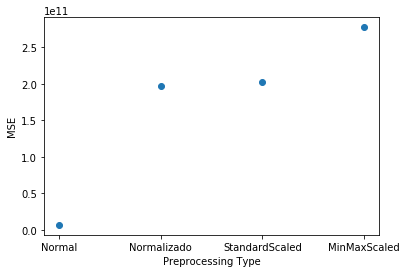

In [22]:
mses = [MSE, MSE_norm, MSE_std, MSE_minmax]
plt.xlabel('Preprocessing Type')
plt.ylabel('MSE')
plt.plot(['Normal', 'Normalizado', 'StandardScaled', 'MinMaxScaled'], mses, 'o')
plt.show()